# T21 - We are going to skip this!

Created by Thomas Martin, PhD canidate at [CoRE](https://core.mines.edu/) at Colorado School of Mines. Personal website is [here](https://tmartin.carrd.co/), and email is thomasmartin@mines.edu. One page research profile of CoRE is [here](https://core.mines.edu/wp-content/uploads/sites/206/2019/12/CoREOnePager-scaled.jpg). Feel free to reach out with any questions.

In [2]:
cd drive/My Drive/T21_well_bonanza

[Errno 2] No such file or directory: 'drive/My Drive/T21_well_bonanza'
/content/drive/My Drive/T21_well_bonanza


## Importing and Using Packages

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [4]:
!pip install lasio # the ! before the pip is important

Just installed the lasio package using pip. Lasio is a .las file imput and output reader. It's a great way to read in a .las file (well logs, not LiDAR) to use in python. After installing it, you still need to import it. The github for lasio is [here](https://github.com/kinverarity1/lasio). [Read the docs](https://lasio.readthedocs.io/en/latest/) if you like.

In [5]:
import lasio
lasio.__version__

'0.28'

# Well log input and output using lasio (.las input and output)

LasIO (.las input and output) is one of my all time favorite packages. It's updated often, and it works 99.5% of the time with .las files (well logs, not LiDAR data). The github is [here](https://github.com/kinverarity1/lasio). A quick note is all of this is just examples, no promises of petrophysical sense!

In [6]:
las = lasio.read('1044753454.las')

We just read in a las file! Let's do a quick quaility control, and make some plots.

In [7]:
las.well

[HeaderItem(mnemonic="STRT", unit="F", value="1624.5", descr=""),
 HeaderItem(mnemonic="STOP", unit="F", value="5884.75", descr=""),
 HeaderItem(mnemonic="STEP", unit="F", value="0.25", descr=""),
 HeaderItem(mnemonic="NULL", unit="", value="-999.25", descr=""),
 HeaderItem(mnemonic="APD", unit="", value="12.0", descr="ABOVE PERMANENT DATUM"),
 HeaderItem(mnemonic="UWI", unit="", value="15175221820000", descr="API WELLH...),
 HeaderItem(mnemonic="COMP", unit="", value="EOG RESOURCES", descr="COMPANY N...),
 HeaderItem(mnemonic="CTRY", unit="", value="USA", descr="COUNTRY"),
 HeaderItem(mnemonic="DMF", unit="", value="KELLY BUSHING", descr="DRILLING M...),
 HeaderItem(mnemonic="EDF", unit="", value="2844.0", descr="ELEVATION OF DRIL...),
 HeaderItem(mnemonic="EGL", unit="", value="2833.0", descr="ELEVATION OF GROU...),
 HeaderItem(mnemonic="EKB", unit="", value="2845.0", descr="ELEVATION OF KELL...),
 HeaderItem(mnemonic="EPD", unit="", value="2833.0", descr="ELEVATATION OF PE...),
 Hea

In [8]:
print('Company name:',las.well['COMP'].value)
print('Well name:',las.well['WELL'].value)

Company name: EOG RESOURCES
Well name: BLACK 33 #1


Wow, this well has a lot of curves! OK, we are going to make a data frame for the data in the .las file. This will behave really similar to the previous data frame

In [9]:
data = las.df() # This time we named the dataframe data and not df
data = data.dropna(thresh=10) # dropping all rows with 10 NaN's, just for this demo

data.head(15)

,CALIPER,DT,GAMMARAY,ITTT,MMK,SPHI,TENS,TPUL,CALI,CT90,DLIM,DPHD,DPHI,DPHS,DRHO,GR,MINV,MNOR,NPHD,NPHI,NPHL,NPHS,PE,QF,QN,RHOB,RMUD,RT,RT10,RT20,RT30,RT60,RT90,RXO,RXRT,SP
DEPT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1690.25,4.5,61.0528,41.6066,286550.3125,NaN,9.5140,74.1818,NaN,4.5,0.0350,-0.0000,-0.0000,-0.0000,-0.0001,0.0000,41.8421,0.0214,0.0265,-0.0000,-0.0,-0.0,0.0000,0.0017,-0.0002,-0.0002,0.0010,0.0200,94.9999,0.2989,0.1522,0.4638,1.3872,88.0676,0.2989,-0.0669,151.1486
1690.50,4.5,61.8054,39.9914,286535.0000,NaN,10.0462,148.3636,NaN,4.5,0.0701,-0.0001,-0.0000,-0.0001,-0.0001,0.0000,39.9914,0.0429,0.0530,-0.0000,-0.0,-0.0,0.0000,0.0035,-0.0005,-0.0004,0.0021,0.0401,189.9998,0.5977,0.3045,0.9277,2.7743,176.1351,0.5977,-0.1339,151.3663
1690.75,4.5,62.5141,38.5193,286519.5312,NaN,10.5475,222.5454,NaN,4.5,0.1051,-0.0001,-0.0000,-0.0001,-0.0002,0.0000,38.8726,0.0643,0.0795,-0.0000,-0.0,-0.0,0.0000,0.0052,-0.0007,-0.0006,0.0031,0.0601,284.9996,0.8966,0.4567,1.3915,4.1615,264.2027,0.8966,-0.2008,151.4814
1691.00,4.5,63.3363,37.7538,286504.0625,NaN,11.1289,296.7273,NaN,4.5,0.1402,-0.0002,-0.0000,-0.0002,-0.0002,0.0001,37.7538,0.0858,0.1060,-0.0000,-0.0,-0.0,0.0000,0.0070,-0.0009,-0.0007,0.0041,0.0802,379.9995,1.1955,0.6089,1.8554,5.5486,352.2703,1.1955,-0.2678,151.5964
1691.25,4.5,64.0372,39.0745,286488.1562,NaN,11.6246,370.9091,NaN,4.5,0.1752,-0.0002,-0.0000,-0.0002,-0.0003,0.0001,39.1040,0.1072,0.1326,-0.0000,-0.0,-0.0,0.0000,0.0087,-0.0011,-0.0009,0.0052,0.1002,474.9994,1.4943,0.7611,2.3192,6.9358,440.3379,1.4943,-0.3347,151.4870
1691.50,4.5,64.5227,40.4541,286472.0000,NaN,11.9679,445.0909,NaN,4.5,0.2103,-0.0003,-0.0001,-0.0003,-0.0003,0.0001,40.4541,0.1287,0.1591,-0.0000,-0.0,-0.0,0.0000,0.0105,-0.0014,-0.0011,0.0062,0.1203,569.9993,1.7932,0.9134,2.7830,8.3229,528.4055,1.7932,-0.4017,151.3775
1691.75,4.5,64.6648,41.3458,286455.5938,NaN,12.0685,519.2727,NaN,4.5,0.2453,-0.0003,-0.0001,-0.0003,-0.0004,0.0001,41.4804,0.1501,0.1856,-0.0000,-0.0,-0.0,0.0000,0.0122,-0.0016,-0.0013,0.0072,0.1403,664.9991,2.0921,1.0656,3.2469,9.7101,616.4730,2.0921,-0.4686,151.0730
1692.00,4.5,64.3887,42.5067,286439.0625,NaN,11.8732,593.4545,NaN,4.5,0.2804,-0.0003,-0.0001,-0.0003,-0.0005,0.0001,42.5067,0.1716,0.2121,-0.0001,-0.0,-0.0,0.0001,0.0140,-0.0018,-0.0015,0.0082,0.1604,759.9990,2.3909,1.2178,3.7107,11.0972,704.5406,2.3909,-0.5356,150.7685
1692.25,4.5,63.7198,41.4131,286422.5938,NaN,11.4002,667.6364,NaN,4.5,0.3154,-0.0004,-0.0001,-0.0004,-0.0005,0.0001,41.6865,0.1930,0.2386,-0.0001,-0.0,-0.0,0.0001,0.0157,-0.0021,-0.0017,0.0093,0.1804,854.9989,2.6898,1.3700,4.1746,12.4844,792.6082,2.6898,-0.6025,150.2351


Scroll around! If you want to get a handle on stats of your well curves, using the describe function on a dataframe is awesome. 

In [10]:
data.to_csv('well_data.csv') # just saved it out!

Once this is in a data frame, you can export the curve data as a csv! This can be used in excel, spotfire, matlab or any other program you are more familiar with. This alone saves tons of time! While I prefer python, I know it's not for everyone.

In [11]:
data.describe()

,CALIPER,DT,GAMMARAY,ITTT,MMK,SPHI,TENS,TPUL,CALI,CT90,DLIM,DPHD,DPHI,DPHS,DRHO,GR,MINV,MNOR,NPHD,NPHI,NPHL,NPHS,PE,QF,QN,RHOB,RMUD,RT,RT10,RT20,RT30,RT60,RT90,RXO,RXRT,SP
count,16625.000000,16667.000000,16541.000000,16667.000000,16698.000000,16667.000000,16724.000000,16698.000000,16626.000000,16724.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16542.000000,16624.000000,16624.000000,16582.000000,16582.000000,16582.000000,16582.000000,16620.000000,16620.000000,16620.000000,16620.000000,16724.000000,16724.000000,16724.000000,16724.000000,16724.000000,16724.000000,16724.000000,16724.000000,16724.000000,16510.000000
mean,7.899031,68.792176,64.477292,137092.060354,0.002875,14.987396,3079.261274,0.000180,7.898868,262.619359,0.050827,0.124753,0.050827,0.019408,0.019088,64.475977,23.388024,23.893228,0.072234,0.085953,0.085953,0.121108,3.970625,-0.053229,-0.045741,2.392277,0.271292,27.944264,23.458263,23.304327,23.639927,24.555432,27.217145,28.088041,0.156734,89.218050
std,0.361280,13.594436,44.583575,80602.691156,0.053540,9.614169,415.702797,0.013403,0.357896,319.419864,0.078096,0.081740,0.078096,0.077647,0.035559,44.360453,19.786355,21.698909,0.073847,0.077647,0.077647,0.087439,1.031098,0.292923,0.263151,0.556143,0.076131,97.107462,57.047795,64.338953,70.757762,75.565632,92.591271,69.404242,0.485612,28.394879
min,4.500000,45.269700,5.148200,0.000000,0.000000,-1.648000,74.181800,0.000000,4.500000,0.035000,-0.148400,-0.050200,-0.148400,-0.190200,-0.043600,5.148200,0.021400,0.026500,-0.021900,-0.008800,-0.008800,0.000000,0.001700,-1.095300,-0.837600,0.001000,0.020000,0.392300,0.298900,0.152200,0.363000,0.390400,0.392300,0.298900,-3.256500,12.059800
25%,7.764700,58.329700,33.404700,68929.179700,0.000000,7.588200,2742.865975,0.000000,7.764625,60.187250,0.015900,0.100100,0.015900,-0.017200,0.000200,33.527750,7.493650,7.231950,0.007400,0.020400,0.020400,0.050900,3.637075,-0.254650,-0.231300,2.465300,0.203575,3.080600,3.998625,3.627925,3.322325,3.165475,3.080900,4.553850,-0.076525,70.123250
50%,7.838600,64.959100,52.365700,136789.375000,0.000000,12.276600,3033.913250,0.000000,7.838900,147.724800,0.045900,0.127600,0.045900,0.011200,0.008900,52.382600,14.900900,14.126850,0.058750,0.072400,0.072400,0.110550,4.265500,-0.055900,-0.053550,2.592100,0.272100,6.822800,8.359650,7.576400,7.159450,6.941700,6.822150,11.095500,0.007500,94.388500
75%,7.935900,76.290250,85.257300,205008.171850,0.000000,20.290150,3439.424975,0.000000,7.936100,324.891625,0.092100,0.169800,0.092100,0.059100,0.023300,85.211000,38.654900,37.536075,0.113600,0.128975,0.128975,0.172700,4.665825,0.150000,0.132500,2.651200,0.345000,16.785050,20.503675,18.233575,17.123650,16.722550,16.817950,27.260900,0.408175,109.289350
max,13.059800,125.664600,443.152900,286550.312500,1.000000,55.208400,3820.532500,1.000000,13.059800,2548.850100,0.336900,0.393700,0.336900,0.312800,0.317800,443.152900,72.430400,96.573200,0.379300,0.414300,0.414300,0.456600,7.425500,1.136600,0.928600,2.963800,0.387200,1966.817500,1636.510000,1696.051300,1738.213500,1748.956800,1966.817500,2000.000000,2.418000,167.353900


In [12]:
data.describe(percentiles=(.1,.9)) # some people want a P90 or a P10

,CALIPER,DT,GAMMARAY,ITTT,MMK,SPHI,TENS,TPUL,CALI,CT90,DLIM,DPHD,DPHI,DPHS,DRHO,GR,MINV,MNOR,NPHD,NPHI,NPHL,NPHS,PE,QF,QN,RHOB,RMUD,RT,RT10,RT20,RT30,RT60,RT90,RXO,RXRT,SP
count,16625.000000,16667.000000,16541.000000,16667.000000,16698.000000,16667.000000,16724.000000,16698.000000,16626.000000,16724.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16542.000000,16624.000000,16624.000000,16582.000000,16582.000000,16582.000000,16582.000000,16620.000000,16620.000000,16620.000000,16620.000000,16724.000000,16724.000000,16724.000000,16724.000000,16724.000000,16724.000000,16724.000000,16724.000000,16724.000000,16510.000000
mean,7.899031,68.792176,64.477292,137092.060354,0.002875,14.987396,3079.261274,0.000180,7.898868,262.619359,0.050827,0.124753,0.050827,0.019408,0.019088,64.475977,23.388024,23.893228,0.072234,0.085953,0.085953,0.121108,3.970625,-0.053229,-0.045741,2.392277,0.271292,27.944264,23.458263,23.304327,23.639927,24.555432,27.217145,28.088041,0.156734,89.218050
std,0.361280,13.594436,44.583575,80602.691156,0.053540,9.614169,415.702797,0.013403,0.357896,319.419864,0.078096,0.081740,0.078096,0.077647,0.035559,44.360453,19.786355,21.698909,0.073847,0.077647,0.077647,0.087439,1.031098,0.292923,0.263151,0.556143,0.076131,97.107462,57.047795,64.338953,70.757762,75.565632,92.591271,69.404242,0.485612,28.394879
min,4.500000,45.269700,5.148200,0.000000,0.000000,-1.648000,74.181800,0.000000,4.500000,0.035000,-0.148400,-0.050200,-0.148400,-0.190200,-0.043600,5.148200,0.021400,0.026500,-0.021900,-0.008800,-0.008800,0.000000,0.001700,-1.095300,-0.837600,0.001000,0.020000,0.392300,0.298900,0.152200,0.363000,0.390400,0.392300,0.298900,-3.256500,12.059800
10%,7.698240,54.406400,23.848500,24680.209000,0.000000,4.813560,2511.484960,0.000000,7.698400,16.992290,-0.057510,-0.011210,-0.057510,-0.078400,-0.008000,23.980160,3.980220,3.003980,-0.008500,-0.002700,-0.002700,0.011210,2.751570,-0.442610,-0.390420,1.713600,0.163800,1.379880,1.582390,1.483730,1.417940,1.392720,1.380020,1.769180,-0.230900,46.951420
50%,7.838600,64.959100,52.365700,136789.375000,0.000000,12.276600,3033.913250,0.000000,7.838900,147.724800,0.045900,0.127600,0.045900,0.011200,0.008900,52.382600,14.900900,14.126850,0.058750,0.072400,0.072400,0.110550,4.265500,-0.055900,-0.053550,2.592100,0.272100,6.822800,8.359650,7.576400,7.159450,6.941700,6.822150,11.095500,0.007500,94.388500
90%,8.215960,90.348880,115.002700,248241.262520,0.000000,30.232580,3632.069280,0.000000,8.213400,726.297610,0.146300,0.219300,0.146300,0.115200,0.057300,114.901380,56.086870,60.076190,0.177200,0.195500,0.195500,0.243100,4.868400,0.329430,0.301500,2.681100,0.370500,60.085190,62.107530,59.425180,57.947620,58.632320,60.143580,74.473890,0.921670,122.366740
max,13.059800,125.664600,443.152900,286550.312500,1.000000,55.208400,3820.532500,1.000000,13.059800,2548.850100,0.336900,0.393700,0.336900,0.312800,0.317800,443.152900,72.430400,96.573200,0.379300,0.414300,0.414300,0.456600,7.425500,1.136600,0.928600,2.963800,0.387200,1966.817500,1636.510000,1696.051300,1738.213500,1748.956800,1966.817500,2000.000000,2.418000,167.353900


If you want to save out this table as a csv, you can do that in one line:

In [13]:
data.describe().to_csv("petro-stats.csv")

In [14]:
data.RT60.min() # If you just want one of the stats

0.3904

Let's use the quantile function to make some quick cutoffs (will be used in the future).

In [15]:
lowGR = data.GAMMARAY.quantile(.22)
lowGR

31.6365

In [16]:
highRES = data.RT90.quantile(.92)
highRES

79.460056

### Plotting up well log data

Text(0, 0.5, 'Deep Resistivity')

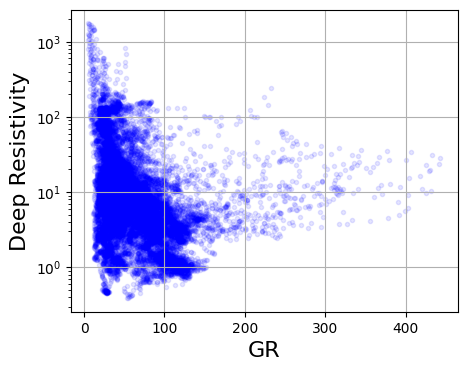

In [17]:
# Cross plot comparing GR to Deep Resistivity
plt.figure(figsize=(5,4), dpi=100) # figure size and dpi you can set here
plt.scatter(data.GAMMARAY.values, data.RT60.values, color='blue', marker='.', alpha=0.1)
plt.yscale('log') #log scale for Y axis

plt.grid(True)
plt.xlabel('GR', size=16)
plt.ylabel('Deep Resistivity', size=16)

Text(0, 0.5, 'Count')

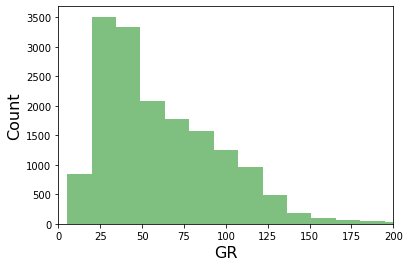

In [18]:
# lets make a histogram of the GR Curve, with 20 bins, in green
plt.hist(data.GAMMARAY.values, bins = 30, color='g', alpha = 0.5)
plt.xlim(0,200)
plt.xlabel('GR', size=16)
plt.ylabel('Count', size=16)

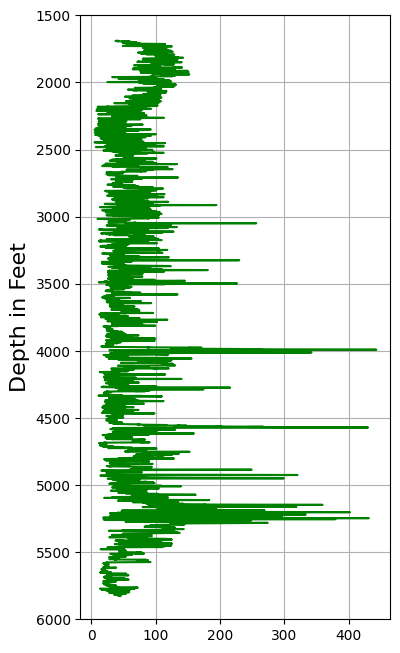

In [19]:
# line plot of the Gamma curve
plt.figure(figsize=(4,8), dpi=100)
plt.plot(data.GAMMARAY.values, data.index, color='g')
plt.ylabel('Depth in Feet', size=16)
plt.ylim(6000,1500)
plt.grid(True)

Let's add a depth track for deep resistivity, a title and a few other additional widigits. Also we will use the well name for the title:

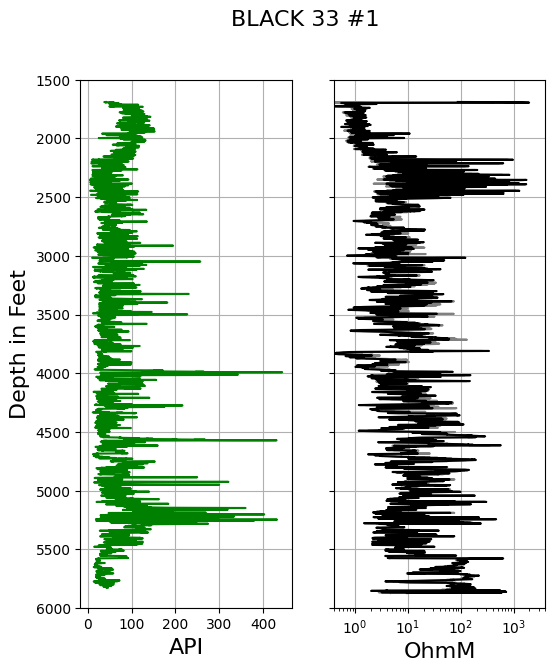

In [20]:
# line plot of the Gamma curve
plt.figure(figsize=(6,7), dpi=100)

plt.suptitle(las.header['Well'].WELL.value, size =16) # overall title

plt.subplot(121) # if we are going to make two plots, matplotlib calls it a subplot
plt.plot(data.GAMMARAY.values, data.index, color='g') # the actual plot!
plt.ylabel('Depth in Feet', size=16)
plt.xlabel('API', size=16)
plt.ylim(6000,1500) # the limit is reversed to go deep down
plt.grid(True) # Turning the grid on

plt.subplot(122)
plt.plot(data.RT20.values, data.index, color='grey')
plt.plot(data.RT90.values, data.index, color='black')
plt.xscale('log')
plt.grid(True)
plt.xlim(0.4,4000)
plt.ylim(6000,1500)
plt.xlabel('OhmM', size=16)
plt.tick_params(labelleft=False)  

plt.savefig('awesome-plot.pdf', dpi=200)

Let's add a pay flag, remember the cutoffs we calcualted above? Let's use those. Using pythonic nomenclature, we will set a true flag, only when both conditions are met.

In [21]:
payMapper = (data.GAMMARAY.values <= lowGR) & (data.RT90.values >= highRES)

If we want to see how many true and false statements there are:

In [22]:
np.bincount(payMapper)

array([15978,   746])

So the GR values have to be below the cutoff, and resistivity have to be above the cutoff.

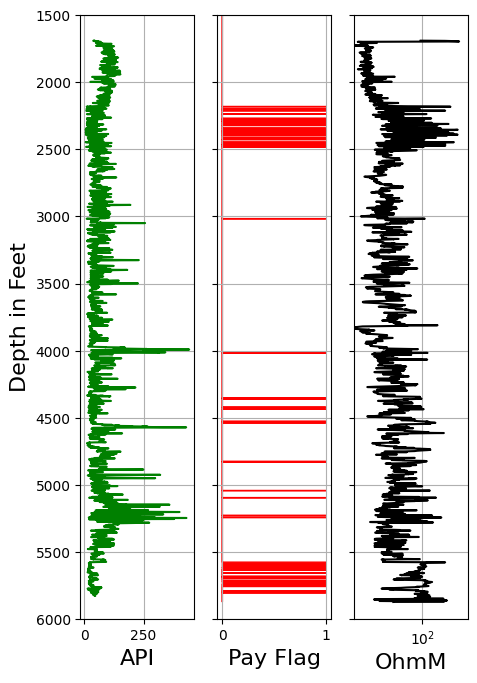

In [23]:
# line plot of the Gamma curve
plt.figure(figsize=(5,8), dpi=100)

plt.subplot(131) # the subplot changed to allow for 3 columns
plt.plot(data.GAMMARAY.values, data.index, color='g')
plt.ylabel('Depth in Feet', size=16)
plt.xlabel('API', size=16)
plt.ylim(6000,1500)
plt.grid(True)

plt.subplot(132) # this is the new pay flag plot
plt.fill_between(payMapper, data.index, color='red') # used fill between, not plot
plt.ylim(6000,1500)
plt.tick_params(labelleft=False)  
plt.xlabel('Pay Flag', size=16)
plt.grid(True)

plt.subplot(133)
plt.plot(data.RT90.values, data.index, color='black')
plt.xscale('log')
plt.grid(True)
plt.xlim(0.4,4000)
plt.ylim(6000,1500)
plt.xlabel('OhmM', size=16)
plt.tick_params(labelleft=False)

#end of notebook